# Machine Learning - Model

In [35]:
# Imports

## Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
%matplotlib inline
from pathlib import Path

# Machine Learning 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE


# Statistics
from imblearn.over_sampling import SMOTE
from statistics import mean

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [36]:
# Package versions
%reload_ext watermark
%watermark -a "Cézar Mendes" --iversions

Author: Cézar Mendes

pandas    : 1.5.3
seaborn   : 0.12.2
matplotlib: 3.7.1
numpy     : 1.24.3
sys       : 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]



## Loading Data

In [37]:
df = pd.read_csv("../data/bankcustomer_clean.csv")
df.head()

,credit_score,gender,age,balance,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,...,tenure_4,tenure_5,tenure_6,tenure_7,tenure_8,tenure_9,tenure_10,products_number_1,products_number_2,products_number_3
0,0.502155,0,0.592593,0.000000,1,1,0.506735,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.478448,0,0.567901,0.334031,0,1,0.562709,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.250000,0,0.592593,0.636357,1,0,0.569654,1,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0.674569,0,0.518519,0.000000,0,0,0.469120,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1.000000,0,0.617284,0.500246,1,1,0.395400,0,0,0,...,0,0,0,0,0,0,0,1,0,0


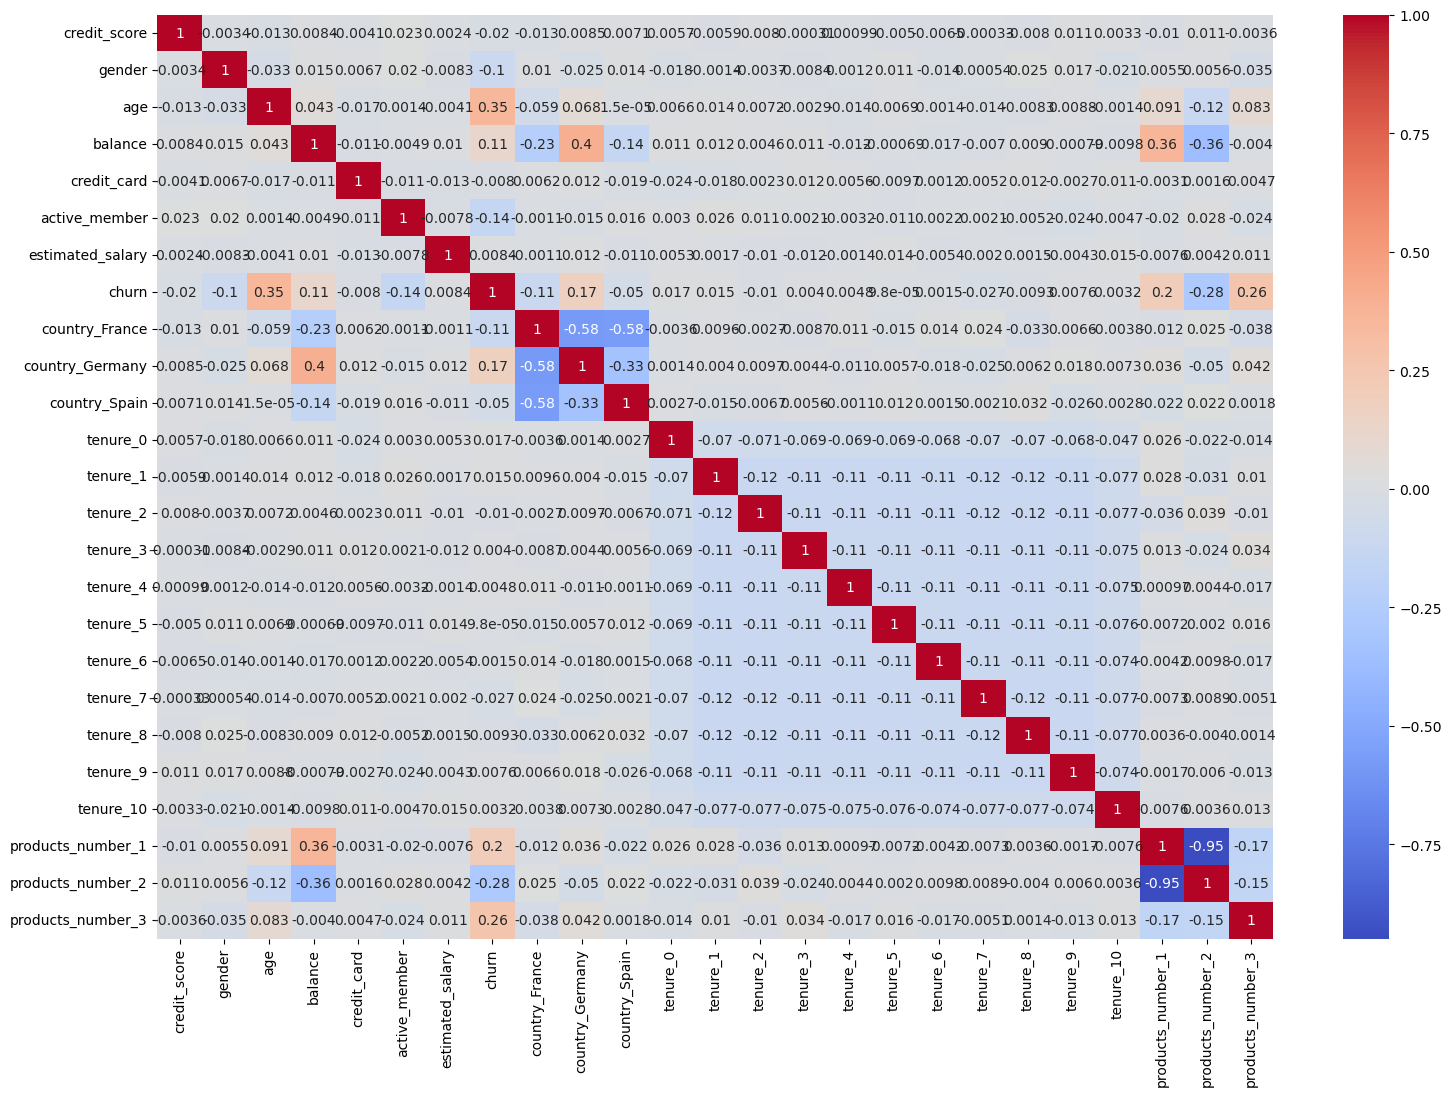

In [38]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

plt.show()

In [39]:
correlation = df.corr()['churn'].abs()
sorted_correlations = correlation.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_top_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_top_drop, axis= 1)

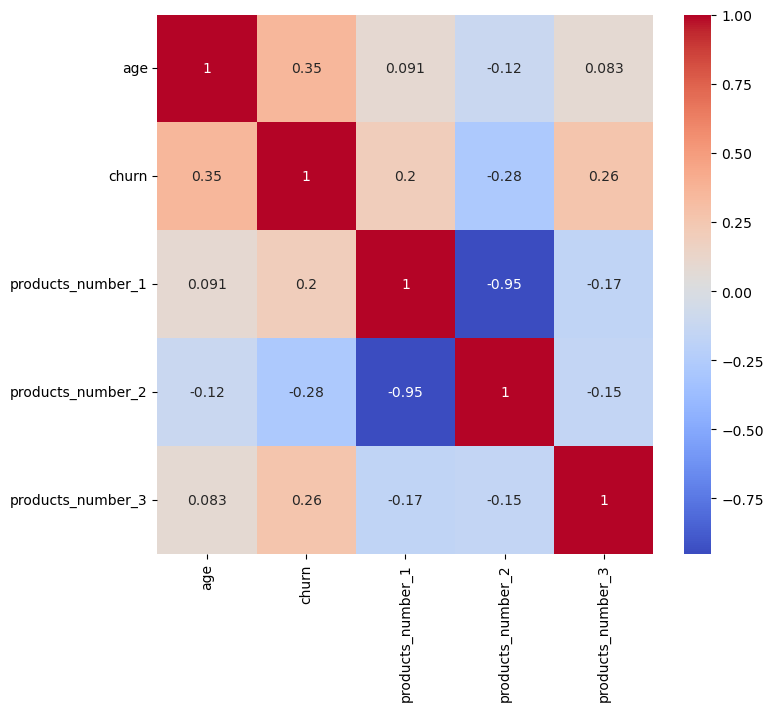

In [40]:
# Correlation
plt.figure(figsize=(8, 7))
sns.heatmap(df_dropped.corr(), annot= True, cmap='coolwarm')
plt.show()

In [41]:
df.head()

,credit_score,gender,age,balance,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,...,tenure_4,tenure_5,tenure_6,tenure_7,tenure_8,tenure_9,tenure_10,products_number_1,products_number_2,products_number_3
0,0.502155,0,0.592593,0.000000,1,1,0.506735,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.478448,0,0.567901,0.334031,0,1,0.562709,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.250000,0,0.592593,0.636357,1,0,0.569654,1,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0.674569,0,0.518519,0.000000,0,0,0.469120,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1.000000,0,0.617284,0.500246,1,1,0.395400,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Train/Test Split

In [42]:
X = df.drop(columns=['churn'])
y = df[["churn"]]

X.shape, y.shape

((9404, 24), (9404, 1))

In [43]:
# Training and Test Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)
print(f"Train Shape: {X_train.shape}")
print(f"Test Shape: {X_test.shape}")

Train Shape: (7053, 24)
Test Shape: (2351, 24)


# Training

## Hyperparameter Tuning with Randomized Search

In [44]:
# Defining the hyperparameter grid
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}

In [45]:
# Model
model = GradientBoostingClassifier(random_state=42)

In [46]:
# Creating the Randomized Search object
random_search = RandomizedSearchCV(estimator= model, param_distributions=param_grid, 
                                   n_iter=50, cv=3, n_jobs=-1, verbose=1, random_state=42)

# Performing the Randomized Search
random_search.fit(X_train, y_train.values.ravel())

# Getting the best parameters and best score
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

best_params_random, best_score_random


Fitting 3 folds for each of 50 candidates, totalling 150 fits


({'subsample': 1.0,
  'n_estimators': 50,
  'min_samples_split': 4,
  'min_samples_leaf': 2,
  'max_depth': 3,
  'learning_rate': 0.2},
 0.8644548419112436)

# Investigating Feature Importance

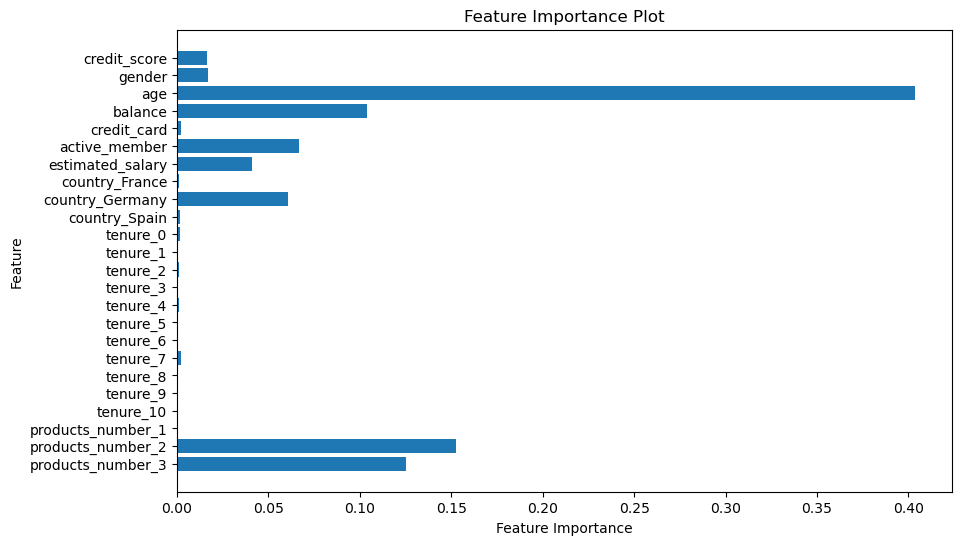

In [47]:
# Creating the Gradient Boosting Classifier model with the best hyperparameters
best_gb_model = GradientBoostingClassifier(**best_params_random, random_state=42)

# Fitting the model
best_gb_model.fit(X_train, y_train.values.ravel())

# Getting feature importances
feature_importances = best_gb_model.feature_importances_

# Visualizing the feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis() # Inverting the y-axis for better visualization
plt.show()

## Recursive Feature Elimination (RFE)

In [48]:
# Creating the RFE object with the best Gradient Boosting Classifier model
selector = RFE(estimator=best_gb_model, n_features_to_select=10, step=1, verbose=1)

# Fitting the RFE object to the training data
selector = selector.fit(X_train, y_train.values.ravel())

# Getting the selected features
selected_features = X_train.columns[selector.support_]

# Displaying the selected features
selected_features

Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


Index(['credit_score', 'gender', 'age', 'balance', 'credit_card',
       'active_member', 'estimated_salary', 'country_Germany',
       'products_number_2', 'products_number_3'],
      dtype='object')

# Handling Imabalance Data

## Checking the Target Variable Distribution

In [49]:
# Frequency Table

# calculate absolute frequency
freq_abs = df.churn.value_counts()

# calculate relative frequency
freq_rel = freq_abs / len(df['churn'])
 
# calculate relative frequency percentage
freq_rel_perc = freq_rel * 100
  
# create frequency table
freq_table = pd.concat([freq_abs, freq_rel, freq_rel_perc], axis=1)

freq_table.columns = ['Frequency Absolute', 'Frequency Relative', 'Frequency Relative (%)']

print(freq_table)

   Frequency Absolute  Frequency Relative  Frequency Relative (%)
0                7584            0.806465               80.646533
1                1820            0.193535               19.353467


## Applying SMOTE for Oversampling

In [50]:
# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train[selected_features], y_train)

# Checking the new distribution of the target variable in the resampled training set
target_distribution_resampled = y_train_resampled['churn'].value_counts(normalize=True)

# Retraining the model with the resampled training data and selected features
best_gb_model.fit(X_train_resampled, y_train_resampled.values.ravel())

# Scoring the model on the test set with selected features
test_score_resampled = best_gb_model.score(X_test[selected_features], y_test)

target_distribution_resampled, test_score_resampled


(0    0.5
 1    0.5
 Name: churn, dtype: float64,
 0.803913228413441)

# Evaluation

In [51]:
# Applying SMOTE to the training data with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# Retraining the Gradient Boosting Classifier with the best hyperparameters
best_gb_model.fit(X_train_resampled, y_train_resampled.values.ravel())

# Making predictions on the test set using the selected features
predictions_resampled = best_gb_model.predict(X_test_selected)


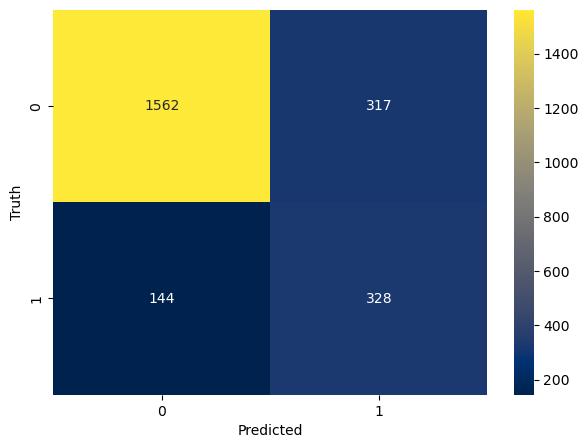

In [52]:
# Create confusion matrix
cm = confusion_matrix(y_test, predictions_resampled)

# Plot confusion matrix
plt.figure(figsize=(7,5))
           
sns.color_palette("tab10")
sns.heatmap(cm, annot=True, fmt='d', cmap= 'cividis')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [53]:
print(classification_report(y_test, predictions_resampled))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1879
           1       0.51      0.69      0.59       472

    accuracy                           0.80      2351
   macro avg       0.71      0.76      0.73      2351
weighted avg       0.83      0.80      0.81      2351



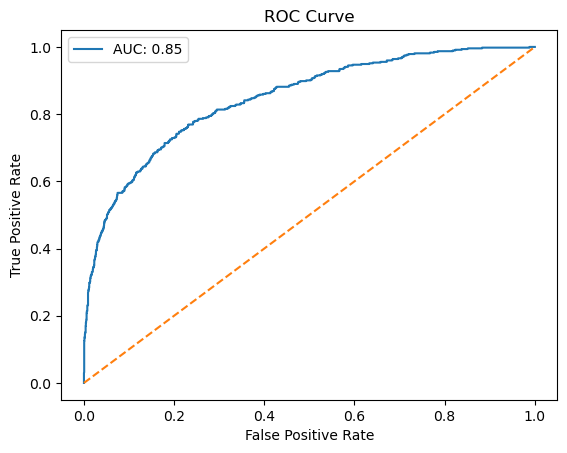

In [54]:
# Get predicted probabilities for the positive class
y_probs = best_gb_model.predict_proba(X_test[selected_features])[:, 1]

# Calculate TPR and FPR
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Calculate AUC
auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Conclusion

The overall accuracy is good, but stakeholders should consider the specific business context and the relative importance of correctly predicting churn versus non-churn cases. On the other hand, it is better to be prepared for a possible customer leaving, and to seek strategies to retain them, even if the probability of them leaving is not high.